In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

pd.options.display.max_columns = None

sns.set()

In [23]:
def woe_discrete(df,var,target):
    df1 = pd.concat([df[var],target],axis=1)
    df2 = df1.groupby(var).agg({'good_bad':'mean'}).reset_index()
    df3 = pd.concat([df2,df1[var].value_counts().sort_index().reset_index().iloc[:,1]],axis=1)
    df3.columns = ['grade','good_prop','cnt']
    # Good / bad
    df3['good'] = df3['good_prop'] * df3.cnt
    df3['bad'] = (1-df3['good_prop']) * df3.cnt
    # As %
    df3['good_pct'] = df3.good / df3.good.sum()
    df3['bad_pct'] = df3.bad / df3.bad.sum()
    # Woe
    df3['woe'] = np.log(df3.good_pct / df3.bad_pct)
    df3.sort_values('woe',inplace=True)
    df3.reset_index(drop=True,inplace=True)
    # Differences
    df3['diff_good_prop'] = df3.good_prop.diff().abs()
    df3['diff_woe'] = df3.woe.diff().abs()
    # IV
    df3['iv'] = (df3.woe * (df3.good_pct - df3.bad_pct)).sum()
    return df3

In [24]:
def plot_by_woe(df,rotation=0):
    x = df.iloc[:,0]
    y = df.loc[:,'woe']
    plt.figure(figsize=(18,6))
    plt.plot(x,y,marker='o',linestyle='--',color='k')
    plt.title('Weight of evidence by '+df.columns.values[0])
    plt.xlabel(df.columns.values[0])
    plt.ylabel('WoE')
    plt.xticks(rotation=rotation)

In [25]:
df_use = pd.read_csv('../processed/x_test.csv')
target_use = pd.read_csv('../processed/y_test.csv')

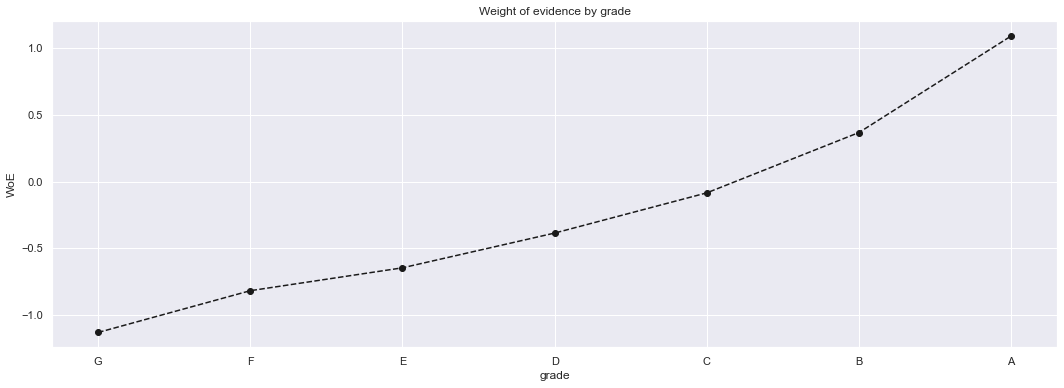

In [26]:
df_temp = woe_discrete(df_use,'grade',target_use)
plot_by_woe(df_temp)

In [27]:
df_temp = woe_discrete(df_use,'home_ownership',target_use)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,OTHER,0.844444,45,38.0,7.0,0.000450,0.000788,-0.559942,NaN,NaN,0.023506
1,RENT,0.889660,37874,33695.0,4179.0,0.399334,0.470661,-0.164340,0.045216,0.395601,0.023506
2,NONE,0.900000,10,9.0,1.0,0.000107,0.000113,-0.054393,0.010340,0.109947,0.023506
3,OWN,0.902723,8409,7591.0,818.0,0.089964,0.092127,-0.023761,0.002723,0.030632,0.023506
4,MORTGAGE,0.917432,46919,43045.0,3874.0,0.510145,0.436310,0.156341,0.014709,0.180102,0.023506


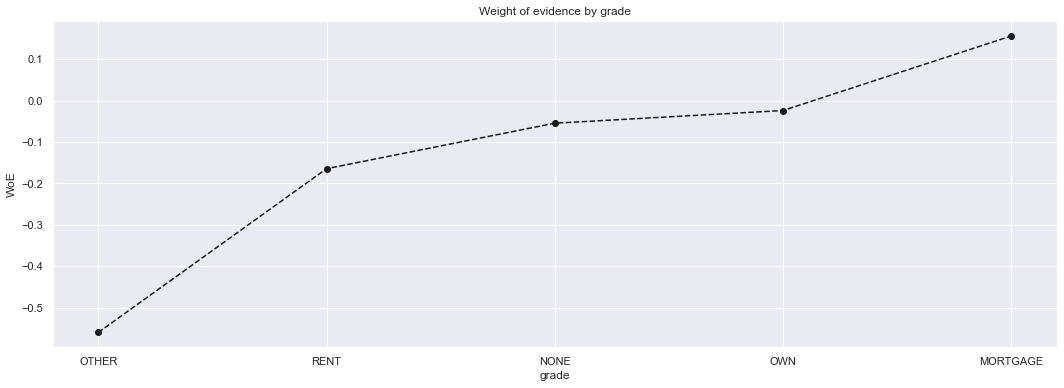

In [28]:
plot_by_woe(df_temp)

We should merge based on 2 factors: 
- Number of observations per category
- Similar WoE

Since OTHER, NONE and ANY have too little observations, we can group them with a big category, such as RENT (the category with the most risk)

In [29]:
df_use['home_ownership_OTHER_NONE_ANY_RENT'] = df_use['home_ownership_OTHER'] + df_use['home_ownership_NONE'] +\
                                            df_use['home_ownership_ANY'] + df_use['home_ownership_RENT']

In [30]:
df_temp = woe_discrete(df_use,'addr_state',target_use)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,ID,0.500000,2,1.0,1.0,0.000012,0.000113,-2.251618,NaN,NaN,inf
1,NV,0.878274,1298,1140.0,158.0,0.013511,0.017795,-0.275429,0.378274,1.976189,inf
2,HI,0.882716,486,429.0,57.0,0.005084,0.006420,-0.233212,0.004442,0.042217,inf
3,FL,0.886088,6426,5694.0,732.0,0.067482,0.082442,-0.200230,0.003372,0.032982,inf
4,AL,0.886633,1182,1048.0,134.0,0.012420,0.015092,-0.194819,0.000545,0.005411,inf
5,LA,0.886726,1130,1002.0,128.0,0.011875,0.014416,-0.193895,0.000093,0.000924,inf
6,NJ,0.887378,3676,3262.0,414.0,0.038659,0.046627,-0.187388,0.000652,0.006507,inf
7,DE,0.894231,208,186.0,22.0,0.002204,0.002478,-0.116914,0.006853,0.070474,inf
8,NY,0.895530,8031,7192.0,839.0,0.085235,0.094493,-0.103104,0.001299,0.013810,inf
9,RI,0.895782,403,361.0,42.0,0.004278,0.004730,-0.100409,0.000252,0.002694,inf


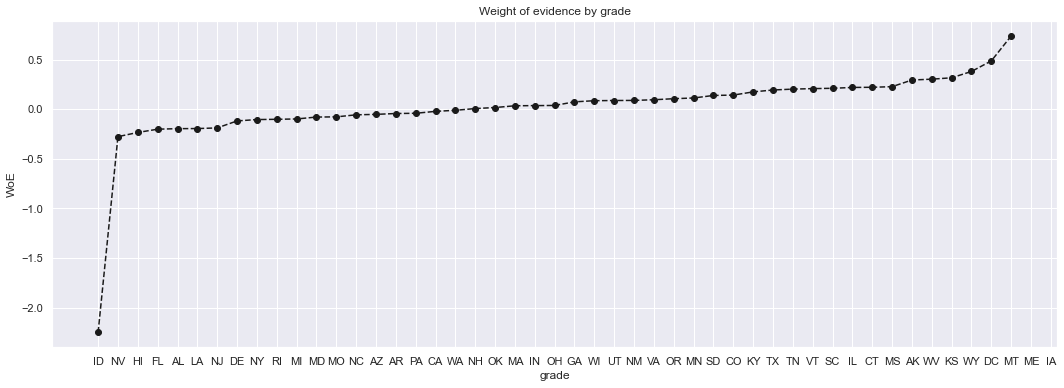

In [31]:
plot_by_woe(df_temp)

In [32]:
if('addr_state_ND' in df_use.columns.values):
    pass
else:
    df_use['addr_state_ND'] = 0

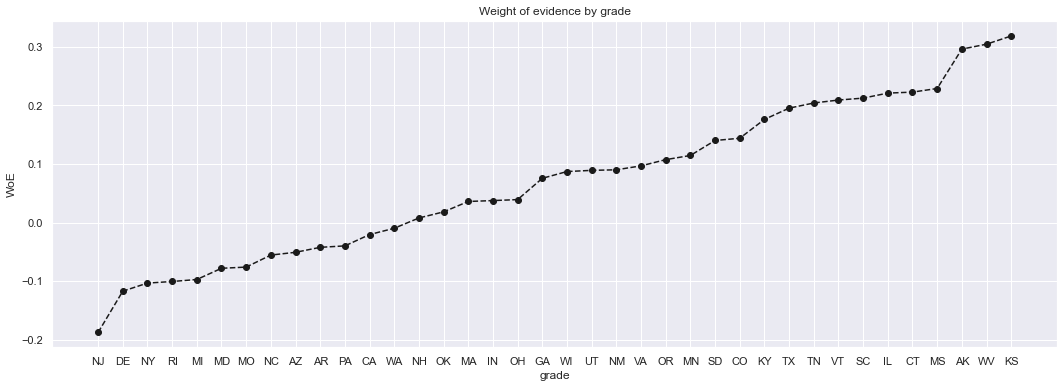

In [33]:
plot_by_woe(df_temp.iloc[6:-6,:])

In [34]:
df_use['addr_state_ND_NE_IA_NV_FL_HI_AL'] = sum([df_use['addr_state_ND'], df_use['addr_state_NE'],
                                                         df_use['addr_state_IA'], df_use['addr_state_NV'],
                                                         df_use['addr_state_FL'], df_use['addr_state_HI'],
                                                         df_use['addr_state_AL']])

df_use['addr_state_NM_VA'] = sum([df_use['addr_state_NM'], df_use['addr_state_VA']])

df_use['addr_state_OK_TN_MO_LA_MD_NC'] = sum([df_use['addr_state_OK'], df_use['addr_state_TN'],
                                              df_use['addr_state_MO'], df_use['addr_state_LA'],
                                              df_use['addr_state_MD'], df_use['addr_state_NC']])

df_use['addr_state_UT_KY_AZ_NJ'] = sum([df_use['addr_state_UT'], df_use['addr_state_KY'],
                                              df_use['addr_state_AZ'], df_use['addr_state_NJ']])

df_use['addr_state_AR_MI_PA_OH_MN'] = sum([df_use['addr_state_AR'], df_use['addr_state_MI'],
                                              df_use['addr_state_PA'], df_use['addr_state_OH'],
                                              df_use['addr_state_MN']])

df_use['addr_state_RI_MA_DE_SD_IN'] = sum([df_use['addr_state_RI'], df_use['addr_state_MA'],
                                              df_use['addr_state_DE'], df_use['addr_state_SD'],
                                              df_use['addr_state_IN']])

df_use['addr_state_GA_WA_OR'] = sum([df_use['addr_state_GA'], df_use['addr_state_WA'],
                                              df_use['addr_state_OR']])

df_use['addr_state_WI_MT'] = sum([df_use['addr_state_WI'], df_use['addr_state_MT']])

df_use['addr_state_IL_CT'] = sum([df_use['addr_state_IL'], df_use['addr_state_CT']])

df_use['addr_state_KS_SC_CO_VT_AK_MS'] = sum([df_use['addr_state_KS'], df_use['addr_state_SC'],
                                              df_use['addr_state_CO'], df_use['addr_state_VT'],
                                              df_use['addr_state_AK'], df_use['addr_state_MS']])

df_use['addr_state_WV_NH_WY_DC_ME_ID'] = sum([df_use['addr_state_WV'], df_use['addr_state_NH'],
                                              df_use['addr_state_WY'], df_use['addr_state_DC'],
                                              df_use['addr_state_ME'], df_use['addr_state_ID']])

- The first two categories have too little observations, therefore they are grouped with a big category with close WoE, this state is FL. Notice that since AL is close we add it, too. We add ND, too, since we don't have information about it (assume the worst risk).
- We apply the same logic at the end of the categories: from WY to ME.
- Keep in mind that if a variable has too high % of observations, it might be better to leave it alone, and to separate different categories

In [35]:
df_temp = woe_discrete(df_use,'verification_status',target_use)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,Verified,0.886953,33641,29838.0,3803.0,0.353623,0.428314,-0.191625,NaN,NaN,0.024656
1,Source Verified,0.911457,29963,27310.0,2653.0,0.323663,0.298795,0.079944,0.024504,0.271569,0.024656
2,Not Verified,0.918288,29653,27230.0,2423.0,0.322714,0.272891,0.167695,0.006831,0.087751,0.024656


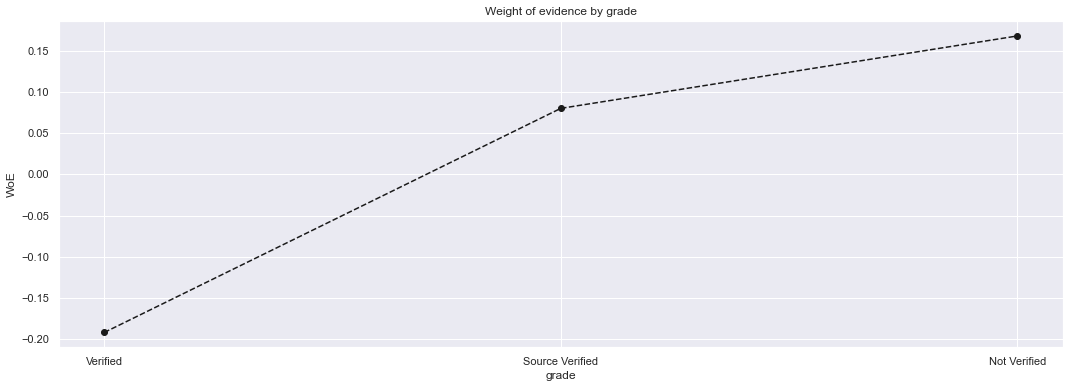

In [36]:
plot_by_woe(df_temp)

In [37]:
df_temp = woe_discrete(df_use,'purpose',target_use)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,renewable_energy,0.771429,70,54.0,16.0,0.000640,0.001802,-1.035222,NaN,NaN,0.047355
1,small_business,0.801537,1431,1147.0,284.0,0.013594,0.031986,-0.855687,0.030109,0.179536,0.047355
2,educational,0.842697,89,75.0,14.0,0.000889,0.001577,-0.573187,0.041159,0.282500,0.047355
3,medical,0.870370,918,799.0,119.0,0.009469,0.013402,-0.347380,0.027674,0.225807,0.047355
4,house,0.872437,439,383.0,56.0,0.004539,0.006307,-0.328934,0.002067,0.018446,0.047355
5,other,0.877445,4806,4217.0,589.0,0.049977,0.066336,-0.283165,0.005008,0.045770,0.047355
6,wedding,0.879386,456,401.0,55.0,0.004752,0.006194,-0.264990,0.001941,0.018175,0.047355
7,moving,0.885382,602,533.0,69.0,0.006317,0.007771,-0.207203,0.005996,0.057787,0.047355
8,vacation,0.887097,496,440.0,56.0,0.005215,0.006307,-0.190195,0.001715,0.017008,0.047355
9,debt_consolidation,0.900640,55012,49546.0,5466.0,0.587191,0.615610,-0.047263,0.013543,0.142931,0.047355


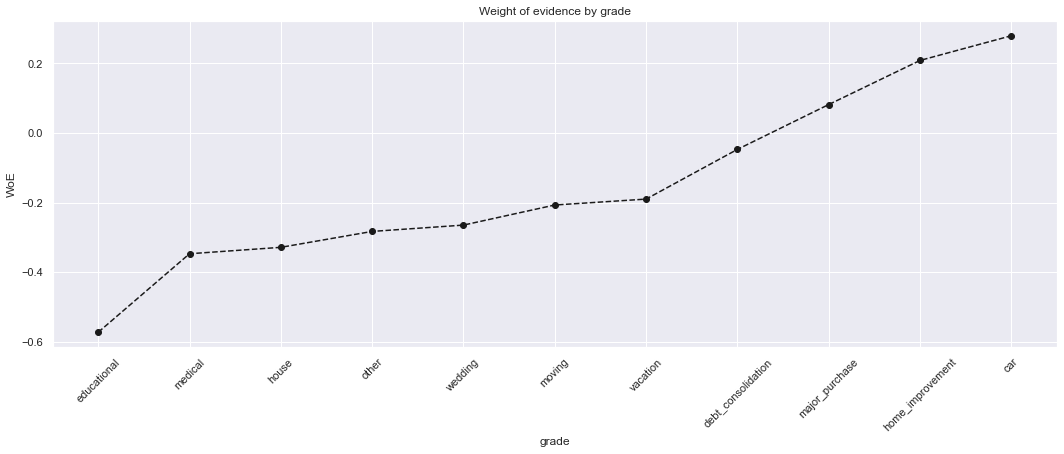

In [38]:
plot_by_woe(df_temp.iloc[2:-1,:],45)

- Categories: small_business, moving, educational + renewable_energy + other + house, medical + wedding + vacation, debt_consolidation, major_purchase + car + home_improvement

In [39]:
df_use['purpose_educational_renewable_energy_other_house'] = df_use[['purpose_educational','purpose_renewable_energy',
                                                                  'purpose_other','purpose_house']].sum(axis=1)
df_use['purpose_medical_wedding_vacation'] = df_use[['purpose_medical','purpose_wedding',
                                                     'purpose_vacation']].sum(axis=1)
df_use['purpose_major_purchase_car_home_improvement'] = df_use[['purpose_major_purchase','purpose_car',
                                                               'purpose_home_improvement']].sum(axis=1)

In [40]:
df_temp = woe_discrete(df_use,'initial_list_status',target_use)
df_temp

,grade,good_prop,cnt,good,bad,good_pct,bad_pct,woe,diff_good_prop,diff_woe,iv
0,f,0.893439,60491,54045.0,6446.0,0.640511,0.725983,-0.125261,NaN,NaN,0.033911
1,w,0.925746,32766,30333.0,2433.0,0.359489,0.274017,0.271493,0.032308,0.396754,0.033911


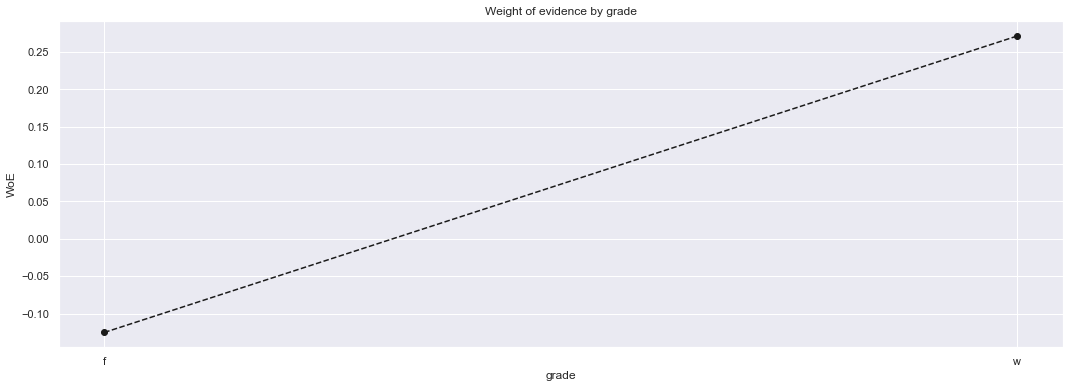

In [41]:
plot_by_woe(df_temp)

In [42]:
df_use.to_csv('../processed/x_test_03_output.csv',index=False)